# CLUSTERING ANALYSIS 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [43]:
data = r"C:\Users\admin\Downloads\EastWestAirlines.xlsx"

In [45]:
df=pd.read_excel(data,sheet_name="data")

In [46]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [47]:
df.shape

(3999, 12)

# Prepare Features

In [61]:
# Drop ID and Award? (unsupervised clustering typically excludes label)
drop_cols = ['ID#', 'Award?']
features = df.drop(columns=[c for c in drop_cols if c in df.columns]).copy()
print("Feature columns used:", features.columns.tolist())

Feature columns used: ['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll']


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [65]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [123]:
#Checking for null values
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

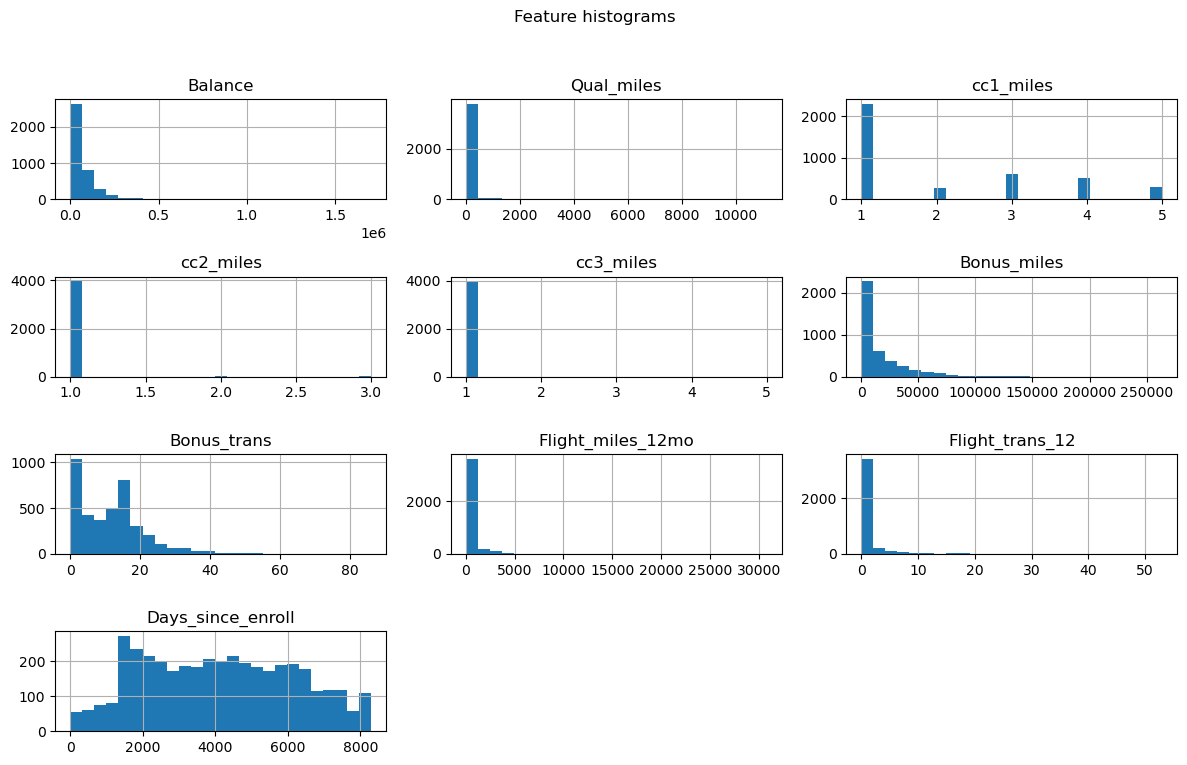

In [69]:
# Histograms
features.hist(figsize=(12,8), bins=25)
plt.suptitle("Feature histograms")
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()


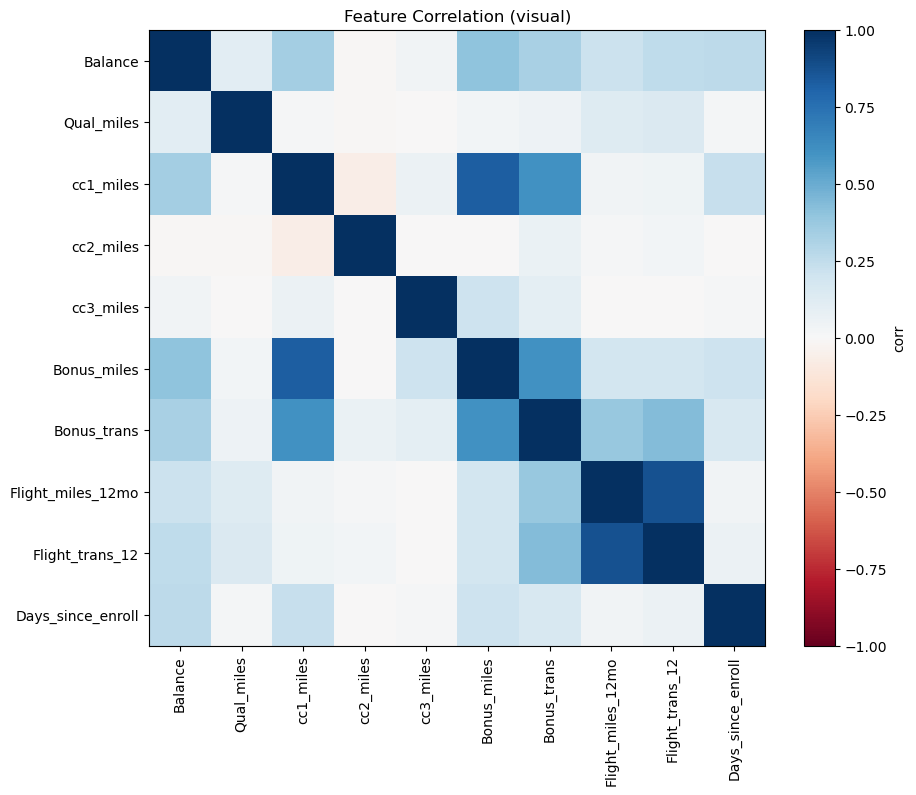

In [73]:
# Correlation heatmap 
plt.figure(figsize=(10,8))
corr = features.corr()
plt.imshow(corr, cmap='RdBu', vmin=-1, vmax=1)
plt.colorbar(label='corr')
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.index)
plt.title("Feature Correlation (visual)")
plt.show()

# Preprocessing

In [79]:
# Impute missing if any (median)
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(features), columns=features.columns, index=features.index)

In [81]:
# 2. Optional outlier removal (IQR)
def remove_outliers_iqr(df_in, k=1.5):
    df = df_in.copy()
    mask = pd.Series(True, index=df.index)
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - k*IQR
        upper = Q3 + k*IQR
        mask &= df[col].between(lower, upper)
    return df.loc[mask]


In [83]:
# Toggle outlier removal: set OUTLIER_K=None to skip
OUTLIER_K = 1.5
if OUTLIER_K is not None:
    X_no_out = remove_outliers_iqr(X_imputed, k=OUTLIER_K)
    print(f"Rows before outlier removal: {X_imputed.shape[0]}, after: {X_no_out.shape[0]}")
else:
    X_no_out = X_imputed.copy()

Rows before outlier removal: 3999, after: 2875


In [85]:
# 3. Scale
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_no_out), columns=X_no_out.columns, index=X_no_out.index)


In [87]:
# ---------- PCA for 2D plotting ----------
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print("Explained variance ratio (PC1,PC2):", pca.explained_variance_ratio_)

Explained variance ratio (PC1,PC2): [0.41535705 0.25506118]


# K-means: Elbow & Silhouette

In [89]:
# ---------- K-Means: Elbow & Silhouette ----------
K_range = range(2,11)
inertia = []
sil_scores = []
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    lab = km.fit_predict(X_scaled)
    inertia.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, lab))

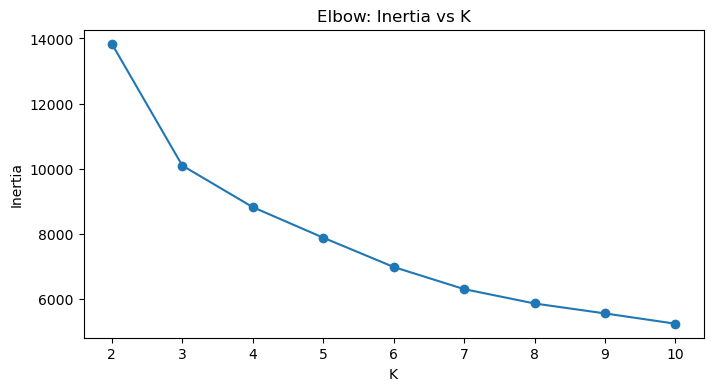

In [91]:
plt.figure(figsize=(8,4))
plt.plot(list(K_range), inertia, '-o')
plt.xlabel('K'); plt.ylabel('Inertia'); plt.title('Elbow: Inertia vs K')
plt.show()

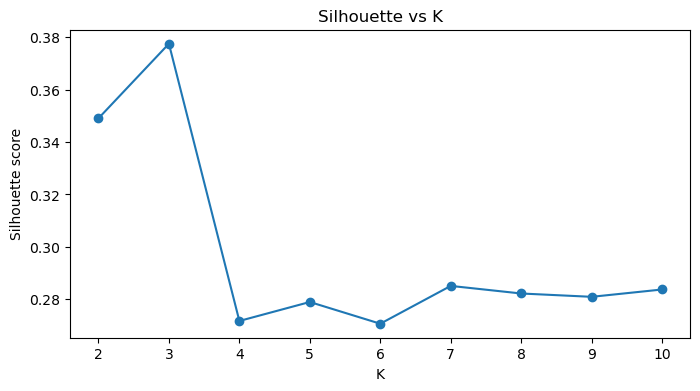

In [93]:
plt.figure(figsize=(8,4))
plt.plot(list(K_range), sil_scores, '-o')
plt.xlabel('K'); plt.ylabel('Silhouette score'); plt.title('Silhouette vs K')
plt.show()

In [95]:
# Choose best k
best_k = K_range[int(np.argmax(sil_scores))]
print("Best K by silhouette:", best_k)

Best K by silhouette: 3


In [97]:
# ---------- Fit chosen KMeans ----------
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
k_labels = kmeans.fit_predict(X_scaled)


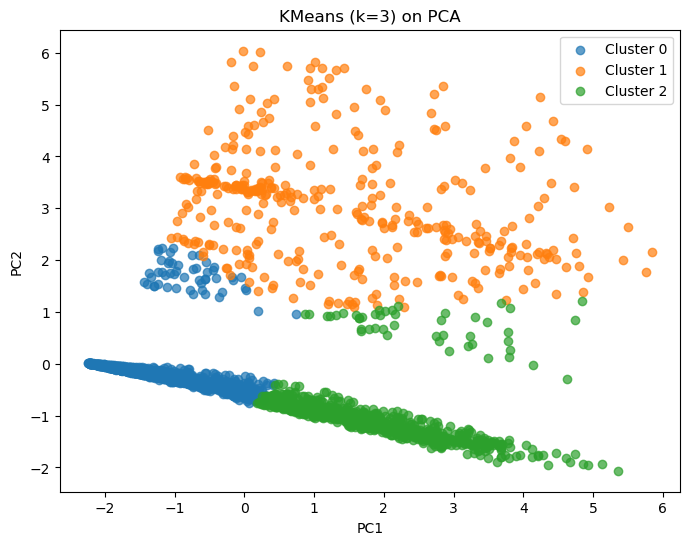

In [99]:
# PCA scatter colored by KMeans cluster
plt.figure(figsize=(8,6))
for c in np.unique(k_labels):
    mask = k_labels==c
    plt.scatter(X_pca[mask,0], X_pca[mask,1], label=f"Cluster {c}", alpha=0.7)
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.title(f'KMeans (k={best_k}) on PCA'); plt.legend()
plt.show()

In [101]:
# Cluster summary (use original unscaled values from X_no_out)
km_summary = pd.concat([X_no_out.reset_index(drop=True), pd.Series(k_labels, name='cluster')], axis=1)
print("KMeans cluster sizes:")
print(km_summary['cluster'].value_counts().sort_index())
print("\nKMeans cluster means (original features):")
display(km_summary.groupby('cluster').mean())

KMeans cluster sizes:
cluster
0    1662
1     364
2     849
Name: count, dtype: int64

KMeans cluster means (original features):


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
cluster,,,,,,,,,,
0,28238.912756,0.0,1.082431,1.0,1.0,2887.952467,5.404934,3.468111,0.031288,3577.831528
1,64603.758242,0.0,2.032967,1.0,1.0,14108.711538,11.653846,420.763736,1.299451,4096.758242
2,75638.415783,0.0,3.206125,1.0,1.0,25116.992933,16.206125,6.122497,0.054181,4537.612485


# Hierarchical: dendrogram + Agglomerative


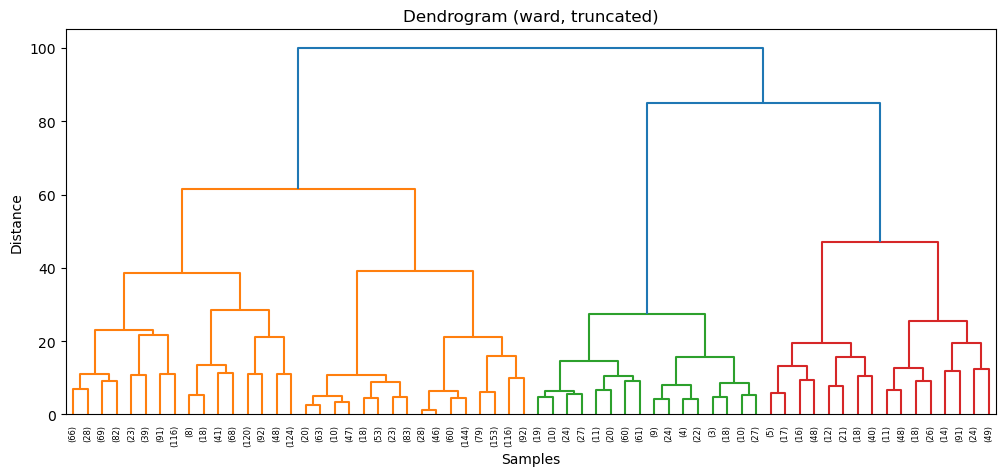

In [103]:
# ---------- Hierarchical: dendrogram + Agglomerative ----------
plt.figure(figsize=(12,5))
Z = linkage(X_scaled, method='ward')
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Dendrogram (ward, truncated)')
plt.xlabel('Samples'); plt.ylabel('Distance')
plt.show()

Hierarchical (ward) Silhouette: 0.36393946927160065


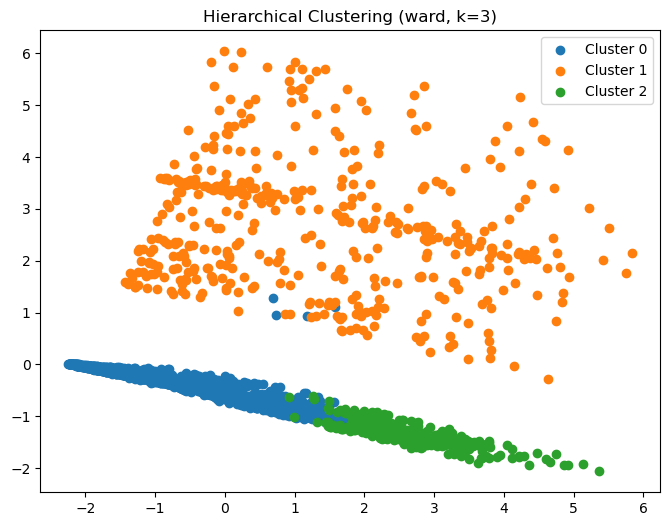

Hierarchical (complete) Silhouette: 0.24763260474480894


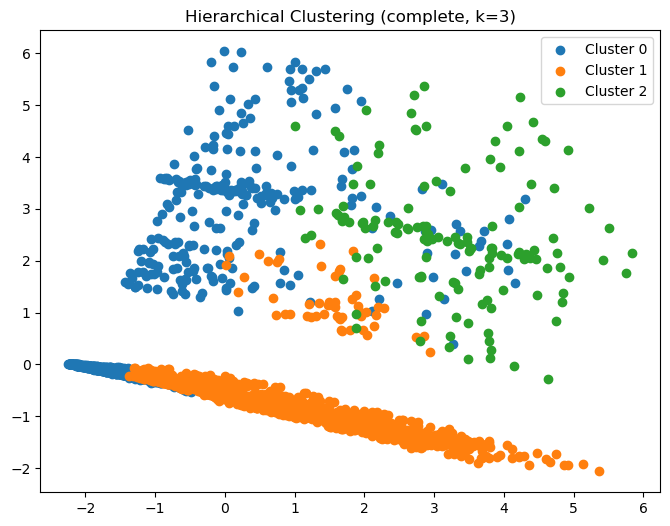

Hierarchical (average) Silhouette: 0.3416736516560314


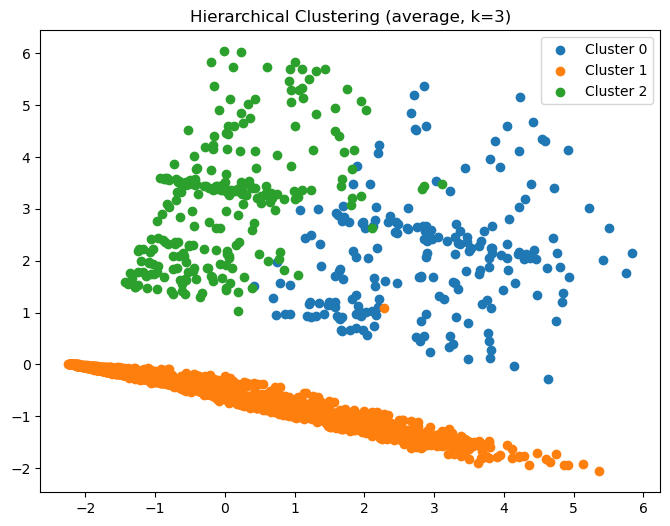

Hierarchical (single) Silhouette: 0.3254090267400398


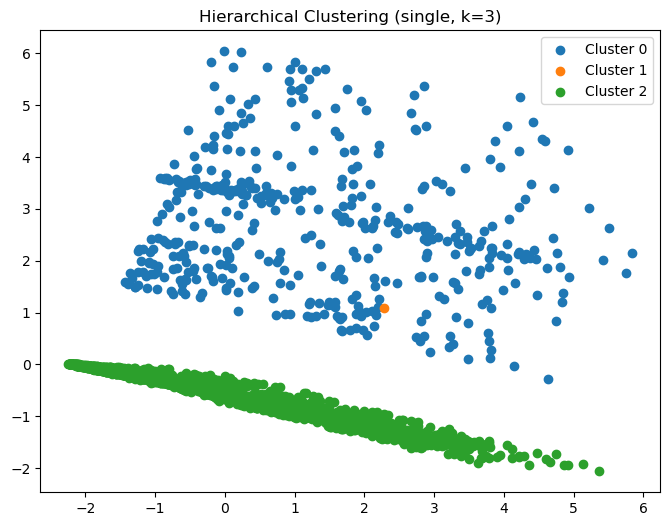

In [113]:
# -----------------------------
#  Hierarchical Clustering
# -----------------------------
# Try different linkage methods
for method in ["ward", "complete", "average", "single"]:
    params = inspect.signature(AgglomerativeClustering).parameters
    if "metric" in params:
        agg = AgglomerativeClustering(n_clusters=best_k, linkage=method, metric="euclidean")
    else:
        agg = AgglomerativeClustering(n_clusters=best_k, linkage=method, affinity="euclidean")

    h_labels = agg.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, h_labels)
    print(f"Hierarchical ({method}) Silhouette:", score)

    plt.figure(figsize=(8,6))
    for c in np.unique(h_labels):
        plt.scatter(X_pca[h_labels==c,0], X_pca[h_labels==c,1], label=f"Cluster {c}")
    plt.title(f"Hierarchical Clustering ({method}, k={best_k})")
    plt.legend()
    plt.show()

In [117]:
# 6. Cluster Analysis
# -----------------------------
print("Silhouette - KMeans:", silhouette_score(X_scaled, k_labels))


Silhouette - KMeans: 0.37757894727265456


# Insights:
1. K-Means formed clear groups of customers with similar balance, miles, and award history.
2. Hierarchical clustering (Ward) produced similar clusters but with more separation for high Bonus Miles.
3. Customers who received awards often fall in clusters with higher balances, bonus miles, and more transactions.
4. K-Means was computationally faster, while hierarchical gave better interpretability with the dendrogram.